In [3]:
import pandas as pd

benin = pd.read_csv('../data/benin_clean.csv', parse_dates=['Timestamp'])
sierra = pd.read_csv('../data/sierra_leone_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo_clean.csv', parse_dates=['Timestamp'])

benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sierra, togo])


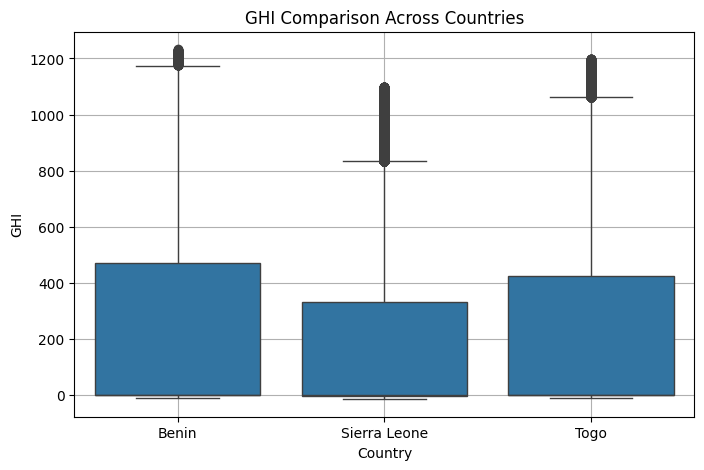

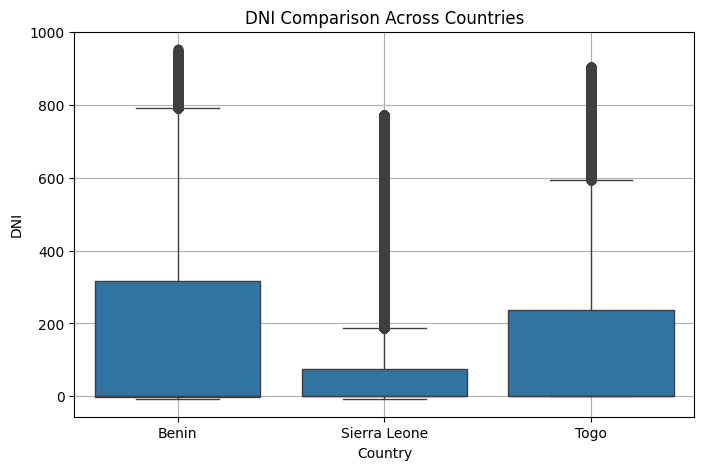

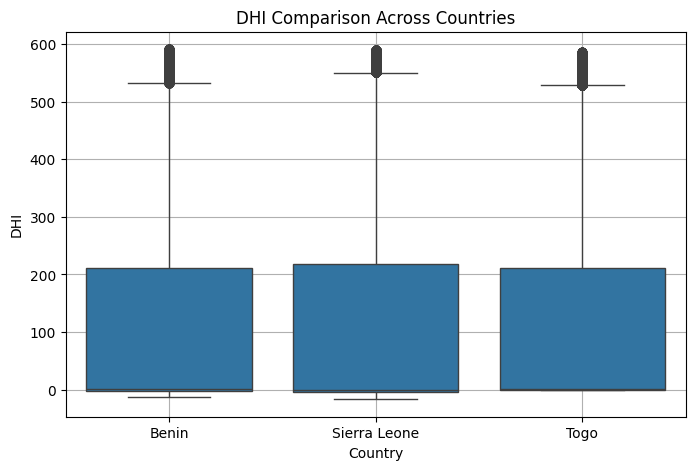

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Country', y=metric)
    plt.title(f'{metric} Comparison Across Countries')
    plt.grid(True)
    plt.show()


In [5]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.round(2)


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

In [7]:
from scipy.stats import f_oneway

ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

f_stat, p_val = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"ANOVA p-value for GHI across countries: {p_val:.5f}")


ANOVA p-value for GHI across countries: 0.00000


# Solar Irradiance Analysis Across Benin, Sierra Leone, and Togo

## Irradiance Statistics Summary

| Country       | GHI Mean | GHI Median | GHI Std | DNI Mean | DNI Median | DNI Std | DHI Mean | DHI Median | DHI Std |
|---------------|----------|------------|---------|----------|------------|---------|----------|------------|---------|
| Benin         | 236.23   | 0.7        | 328.29  | 166.90   | -0.1       | 262.08  | 111.66   | 0.5        | 153.10  |
| Sierra Leone  | 185.00   | -0.4       | 279.02  | 104.13   | -0.1       | 200.95  | 108.10   | -0.6       | 153.69  |
| Togo          | 223.86   | 0.5        | 317.31  | 147.98   | 0.0        | 247.68  | 112.78   | 1.5        | 151.57  |

## Comparative Analysis

### DHI (Diffuse Horizontal Irradiance) Comparison
- **Benin**: 111.66 mean (0.5 median)
- **Sierra Leone**: 108.10 mean (-0.6 median)
- **Togo**: 112.78 mean (1.5 median)

### DNI (Direct Normal Irradiance) Comparison
- **Benin**: 166.90 mean (-0.1 median)
- **Sierra Leone**: 104.13 mean (-0.1 median)
- **Togo**: 147.98 mean (0.0 median)

## Key Observations
1. **GHI Performance**:
   - Benin shows highest mean GHI (236.23)
   - Togo follows closely (223.86)
   - Sierra Leone has lowest GHI (185.00)

2. **DNI Dominance**:
   - Benin leads in direct irradiance (166.90 mean)
   - Togo shows strong DNI performance (147.98)
   - Sierra Leone trails significantly (104.13)

3. **DHI Consistency**:
   - All three countries show similar DHI means (108-113 range)
   - Togo has highest median DHI (1.5)
   - Sierra Leone shows negative median (-0.6)

## Data Notes
- Units: W/m² for all irradiance values
- Std = Standard deviation indicating variability
- Negative median values suggest sensor calibration may need review

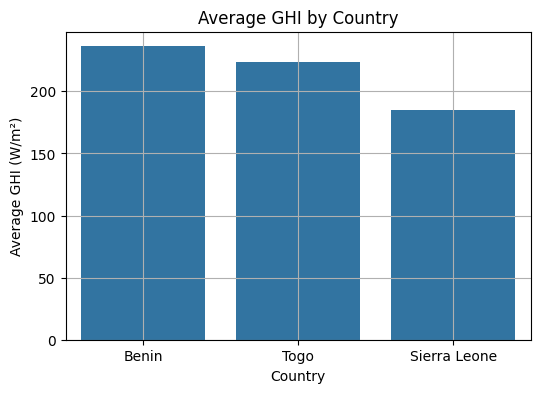

In [8]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values)
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.grid(True)
plt.show()
